In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="qHYDstHgxYF515n9Yrsv")
project = rf.workspace("palm-trees-counting").project("palm-trees-counting")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to palm-trees-counting-1 in yolov8:: 100%|██████████| 154/154 [00:00<00:00, 5295.14it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 28.1 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)


# Train the model
results = model.train(data="/content/palm-trees-counting-1/data.yaml", epochs=100, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/palm-trees-counting-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/palm-trees-counting-1/train/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 1316.68it/s]

train: New cache created: /content/palm-trees-counting-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/palm-trees-counting-1/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 866.30it/s]

val: New cache created: /content/palm-trees-counting-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.3G      3.018      3.448      2.417        147        640: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         14       1016     0.0219     0.0906     0.0127    0.00352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.42G      2.918      3.487       2.34        194        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         14       1016      0.025      0.103     0.0139    0.00429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.4G      2.495      3.338      2.022        174        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         14       1016     0.0424      0.175     0.0251    0.00824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.29G      2.293      3.094      1.901        103        640: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         14       1016     0.0369      0.153     0.0217    0.00801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.97G      2.264      2.806      1.757        203        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14       1016     0.0417      0.172     0.0249    0.00902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.53G      2.278      2.656       1.78        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         14       1016     0.0417      0.172     0.0248    0.00953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.54G      2.157      2.365      1.673        160        640: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         14       1016     0.0352      0.146     0.0214    0.00767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.11G      2.203      2.136      1.714         99        640: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         14       1016     0.0572      0.233     0.0533      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.76G      2.179      2.134      1.644        149        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         14       1016      0.466      0.274      0.276      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.72G      2.093      1.932      1.543        161        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         14       1016      0.485      0.357       0.35      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.49G      2.078      1.784      1.504        186        640: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         14       1016      0.521      0.339      0.356      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.73G      2.116      1.783      1.571        143        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         14       1016      0.076      0.271      0.101     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.72G      2.063      1.727      1.504        139        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         14       1016     0.0971      0.231      0.112     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.79G      2.142      1.832      1.592         97        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         14       1016       0.45      0.177      0.216     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.7G      2.007      1.652      1.472        174        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         14       1016      0.417      0.269      0.262     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.63G       2.05      1.734      1.509        120        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         14       1016      0.394      0.333      0.284      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.64G      1.998      1.635      1.515        178        640: 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         14       1016      0.384      0.385      0.319      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.64G      2.225      1.699      1.556        201        640: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         14       1016      0.444      0.451      0.403      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.44G      1.983      1.638      1.465        217        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         14       1016      0.457      0.458      0.409      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.4G      2.012      1.653       1.54         51        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         14       1016      0.423      0.412      0.359      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.97G      1.966      1.639      1.456        309        640: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         14       1016      0.468      0.448      0.394      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.75G      1.964      1.545      1.448        158        640: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         14       1016      0.468      0.465      0.441      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.59G      1.972      1.515      1.492        199        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         14       1016      0.465      0.469      0.445      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.32G      1.957      1.469      1.493        156        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         14       1016      0.501      0.495      0.471      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.78G      1.922       1.49      1.489        149        640: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


                   all         14       1016      0.465      0.512      0.455      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.95G      1.869      1.421      1.467        130        640: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         14       1016      0.448      0.489      0.454      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.84G      1.851      1.398      1.412        216        640: 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         14       1016      0.433      0.505      0.427      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.28G      1.952      1.525      1.404        359        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         14       1016      0.453      0.475      0.422      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.61G      1.918      1.447      1.459        104        640: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         14       1016      0.535      0.455      0.474      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.15G      1.868      1.483      1.402        182        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         14       1016      0.507       0.52      0.493      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.6G      1.957      1.393      1.435        246        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all         14       1016      0.522      0.533      0.504      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.91G      1.851      1.434      1.436        160        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         14       1016      0.494      0.557      0.512      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.13G      1.895      1.444      1.417        396        640: 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


                   all         14       1016      0.488      0.576      0.518      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.85G      1.859      1.354      1.405        268        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         14       1016      0.514       0.57      0.525      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.46G      1.889      1.421      1.439         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         14       1016       0.54      0.559      0.525      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.55G      1.709      1.327      1.347        150        640: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         14       1016      0.562      0.526      0.524      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.26G      1.731      1.268      1.332        183        640: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         14       1016      0.534      0.534      0.523       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.49G      1.821      1.301      1.398        248        640: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         14       1016      0.537      0.521      0.516      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.65G      1.809      1.402      1.422        150        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         14       1016      0.559      0.513      0.512      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.55G      1.733      1.313      1.369        152        640: 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         14       1016      0.535        0.5      0.501      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.14G       1.83        1.4      1.402        356        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


                   all         14       1016      0.523      0.516      0.496      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.55G      1.732      1.279      1.357        169        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         14       1016      0.513      0.502      0.485      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.89G      1.815       1.31      1.374        241        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         14       1016      0.542      0.508      0.505      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.42G      1.741      1.276      1.354        257        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         14       1016       0.53      0.525      0.511      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.05G      1.859      1.388       1.49         97        640: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         14       1016      0.545      0.533      0.524      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.92G      1.697      1.292      1.386        156        640: 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         14       1016      0.539      0.549      0.539       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.36G      1.641      1.201      1.327        172        640: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         14       1016      0.554      0.531      0.538      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.59G      1.754      1.292      1.379        261        640: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all         14       1016       0.54       0.54      0.541      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.43G      1.766      1.259      1.339        227        640: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         14       1016      0.524      0.531      0.537      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.72G       1.76      1.346      1.358        109        640: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         14       1016      0.502      0.537      0.518      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.13G      1.754      1.344      1.391        144        640: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


                   all         14       1016      0.504      0.502      0.505      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.2G      1.717      1.359       1.37         93        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         14       1016      0.532      0.482      0.504      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.5G      1.727      1.269       1.35        173        640: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         14       1016      0.517      0.523      0.518      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.45G      1.659      1.269      1.349        118        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         14       1016      0.525      0.537       0.52      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.01G      1.685      1.244      1.357        127        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         14       1016      0.532      0.524      0.517      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       3.9G      1.759      1.423      1.421         59        640: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         14       1016      0.535      0.544      0.525       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.85G      1.688      1.269      1.374        115        640: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         14       1016      0.555      0.519       0.52      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.5G      1.707      1.294      1.383        107        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         14       1016      0.565       0.52      0.525      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.63G      1.619       1.33      1.321         54        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         14       1016       0.57      0.518      0.535      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.61G      1.596      1.198       1.28        195        640: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


                   all         14       1016      0.575      0.513      0.535      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.94G      1.703      1.265      1.388        101        640: 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14       1016       0.55      0.519      0.536      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.15G      1.724      1.205      1.329        310        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         14       1016      0.533      0.537      0.541      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.54G       1.71      1.185      1.326        284        640: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         14       1016      0.529      0.541      0.539      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.46G      1.602      1.148      1.298        143        640: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         14       1016      0.543      0.531      0.536      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.84G      1.654      1.217      1.338        124        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         14       1016      0.542      0.539      0.544      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.52G       1.68      1.258      1.345         90        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         14       1016      0.551      0.542      0.551      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.09G       1.67       1.32      1.349         97        640: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         14       1016      0.572      0.552      0.566      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.38G      1.717      1.326      1.366         91        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         14       1016      0.586      0.563      0.569       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.96G      1.593      1.166      1.277        206        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         14       1016      0.572      0.544      0.552      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.4G       1.63      1.187      1.308        133        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         14       1016      0.592      0.528      0.556      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.45G      1.592      1.147      1.282        233        640: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         14       1016       0.55      0.555       0.55      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.19G      1.612      1.145      1.291        216        640: 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         14       1016      0.541      0.573      0.552      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.26G      1.625      1.199      1.324        129        640: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         14       1016      0.544      0.551      0.551      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.06G      1.592      1.111      1.258        141        640: 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         14       1016      0.547      0.535      0.552      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.62G      1.612      1.132      1.283        222        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         14       1016      0.546      0.539      0.556      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         4G      1.579      1.153      1.282        184        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         14       1016      0.534      0.581      0.562      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.1G      1.615      1.173      1.337        146        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all         14       1016      0.577      0.546      0.564      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.41G      1.531       1.11      1.268        161        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14       1016      0.588      0.551      0.566      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.25G      1.592      1.155      1.315        123        640: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14       1016      0.589      0.542      0.565      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.41G      1.582       1.13      1.274        170        640: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         14       1016      0.606      0.534      0.569      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.67G      1.633      1.153      1.323        226        640: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


                   all         14       1016      0.561      0.569      0.564      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.9G      1.583      1.174      1.292         75        640: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         14       1016      0.583      0.542      0.559      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.24G      1.614      1.137      1.319        199        640: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         14       1016      0.589      0.538      0.562      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.41G      1.605      1.126      1.276        220        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         14       1016      0.582       0.54      0.562      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.84G      1.587      1.135      1.271        153        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         14       1016      0.585      0.537      0.563      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.37G      1.641      1.191      1.303        201        640: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         14       1016      0.587      0.543      0.558      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.07G      1.572       1.13      1.278        224        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         14       1016      0.577      0.543      0.554      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.04G       1.59      1.124      1.305        199        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         14       1016      0.563      0.544      0.551      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.16G      1.608       1.13      1.278        254        640: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         14       1016      0.568      0.527       0.55      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.73G      1.645      1.171      1.318        144        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all         14       1016      0.557      0.539      0.551      0.268
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.73G      1.694       1.35      1.361        105        640: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         14       1016      0.588      0.526      0.555      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.71G      1.712      1.421      1.377        128        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


                   all         14       1016      0.598      0.513      0.558       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.71G      1.529      1.184      1.283         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         14       1016      0.565      0.532      0.553      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.69G      1.576      1.201      1.299        110        640: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         14       1016      0.595      0.503      0.552      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.77G       1.72      1.263      1.357        145        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         14       1016      0.595      0.515      0.552      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.88G      1.601      1.198      1.314        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         14       1016      0.599      0.523      0.552      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.9G      1.531        1.2      1.311        135        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         14       1016      0.576      0.536      0.549      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.73G       1.58      1.187      1.287        178        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all         14       1016      0.575      0.537      0.552       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.65G      1.575      1.195       1.29        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


                   all         14       1016      0.572      0.552      0.556      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.63G      1.574      1.206      1.339         94        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         14       1016      0.571       0.55      0.553      0.272

100 epochs completed in 0.058 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


                   all         14       1016      0.607      0.535      0.569      0.281
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


In [5]:
# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a pretrained model (recommended for training)


0: 640x576 11 palm-treess, 65.4ms
Speed: 5.8ms preprocess, 65.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 576)


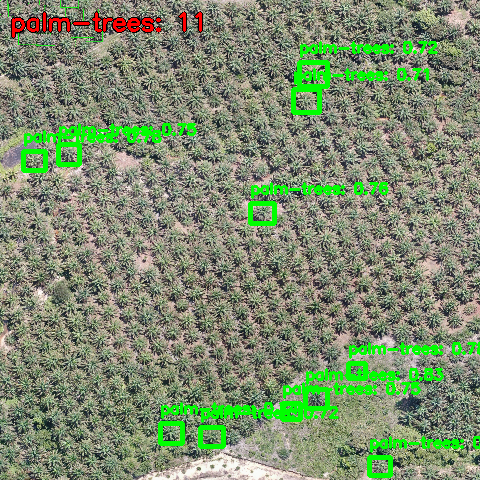

True

In [8]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Dictionary untuk menyimpan jumlah objek per kelas
counter = {}

# Fungsi untuk menggambar hasil deteksi dan counting
def draw_results_non_angka(image, results):
    # Reset counter untuk setiap frame
    counter.clear()

    # Dapatkan ukuran original image
    original_h, original_w = image.shape[:2]

    # Resize image ke 480x480
    image = cv2.resize(image, (480, 480))

    # Get bounding boxes, classes dan confidence scores
    boxes = results[0].boxes.xyxy.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    scores = results[0].boxes.conf.cpu().numpy()

    # Hitung faktor skala berdasarkan ukuran original ke resize
    scale_x = 480 / original_w
    scale_y = 480 / original_h

    # Loop through detections
    for box, cls_id, score in zip(boxes, classes, scores):
        # Convert ke integer dan sesuaikan dengan skala baru
        x1 = int(box[0] * scale_x)
        y1 = int(box[1] * scale_y)
        x2 = int(box[2] * scale_x)
        y2 = int(box[3] * scale_y)
        cls_id = int(cls_id)

        # Dapatkan nama kelas
        class_name = model.names[cls_id]

        # Update counter
        if class_name in counter:
            counter[class_name] += 1
        else:
            counter[class_name] = 1

        # Gambar bounding box dengan ketebalan 3
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Tambahkan label dengan ketebalan 2
        label = f'{class_name}: {score:.2f}'
        cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Tampilkan total counting di pojok kiri atas
    y_pos = 30
    for class_name, count in counter.items():
        text = f'{class_name}: {count}'
        # Background hitam untuk text counting
        cv2.putText(image, text, (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 3)  # outline hitam
        cv2.putText(image, text, (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)  # text merah
        y_pos += 35

    return image

# Proses prediksi dan tampilkan hasilnya
image = cv2.imread("test.jpeg")
results = model.predict(image, conf=0.7, imgsz=640)

# Gambar hasil deteksi dan counting
output_image = draw_results_non_angka(image, results)

cv2_imshow(output_image)

# Simpan hasil
cv2.imwrite('output_non_angka.jpg', output_image)


0: 640x576 11 palm-treess, 9.7ms
Speed: 5.3ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)


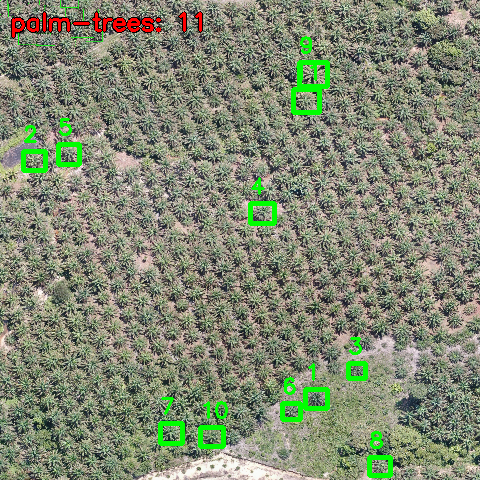

True

In [9]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Dictionary untuk menyimpan jumlah objek per kelas
counter = {}

# Fungsi untuk menggambar hasil deteksi dan counting
def draw_results(image, results):
    # Reset counter untuk setiap frame
    counter.clear()

    # Dapatkan ukuran original image
    original_h, original_w = image.shape[:2]

    # Resize image ke 480x480
    image = cv2.resize(image, (480, 480))

    # Get bounding boxes, classes dan confidence scores
    boxes = results[0].boxes.xyxy.cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    scores = results[0].boxes.conf.cpu().numpy()

    # Hitung faktor skala berdasarkan ukuran original ke resize
    scale_x = 480 / original_w
    scale_y = 480 / original_h

    # Counter untuk penomoran object
    object_number = 1

    # Loop through detections
    for box, cls_id, score in zip(boxes, classes, scores):
        # Convert ke integer dan sesuaikan dengan skala baru
        x1 = int(box[0] * scale_x)
        y1 = int(box[1] * scale_y)
        x2 = int(box[2] * scale_x)
        y2 = int(box[3] * scale_y)
        cls_id = int(cls_id)

        # Dapatkan nama kelas
        class_name = model.names[cls_id]

        # Update counter
        if class_name in counter:
            counter[class_name] += 1
        else:
            counter[class_name] = 1

        # Gambar bounding box dengan ketebalan 3
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Tambahkan nomor object
        cv2.putText(image, str(object_number), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        object_number += 1

    # Tampilkan total counting di pojok kiri atas
    y_pos = 30
    for class_name, count in counter.items():
        text = f'{class_name}: {count}'
        # Background hitam untuk text counting
        cv2.putText(image, text, (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 3)  # outline hitam
        cv2.putText(image, text, (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)  # text merah
        y_pos += 35

    return image

# Proses prediksi dan tampilkan hasilnya
image = cv2.imread("test.jpeg")
results = model.predict(image, conf=0.7, imgsz=640)

# Gambar hasil deteksi dan counting
output_image = draw_results(image, results)

cv2_imshow(output_image)

# Simpan hasil
cv2.imwrite('output_count.jpg', output_image)